In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [214]:
#from the previous lab:

customer_df.drop(['Customer'], axis=1, inplace=True)
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date']) 

In [215]:
customer_df.columns = customer_df.columns.str.replace(" ", "_", regex=True) # replacing spaces with underscore
customer_df.columns = customer_df.columns.str.lower()

In [216]:
numerical_df = customer_df.select_dtypes(exclude="object")
categorical_df = customer_df.select_dtypes(include="object")

In [217]:
#Open the categoricals variable we created before.

categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [218]:
#Plot all the categorical variables with the proper plot. What can you see?

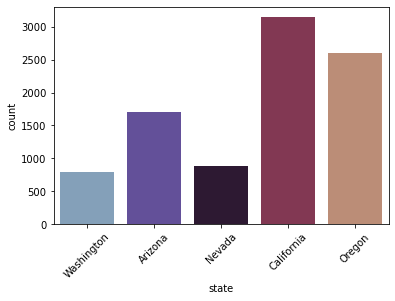

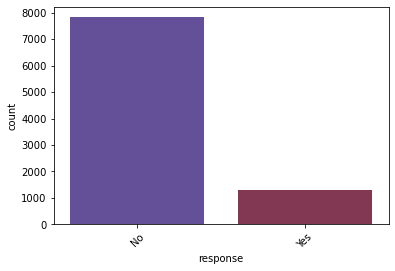

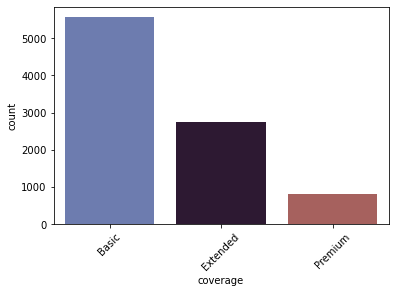

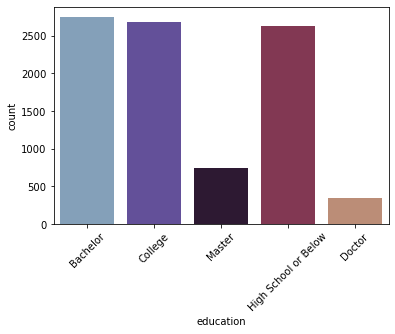

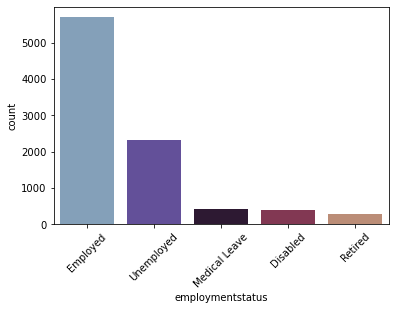

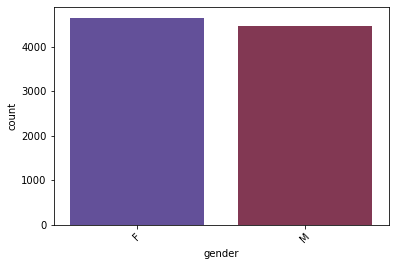

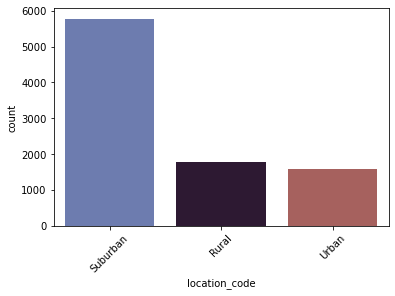

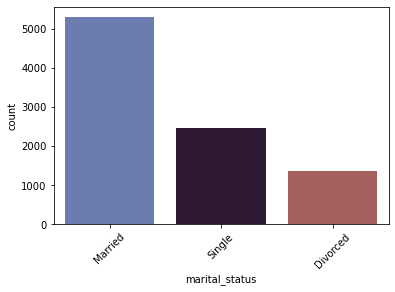

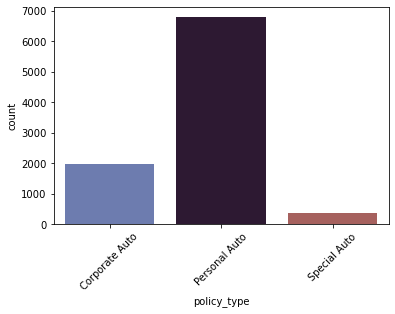

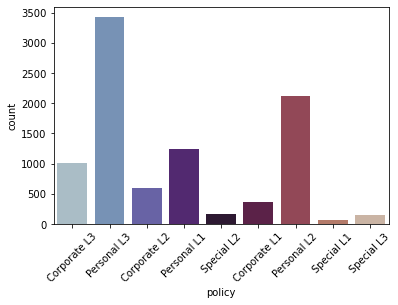

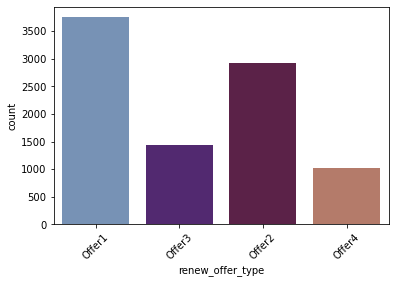

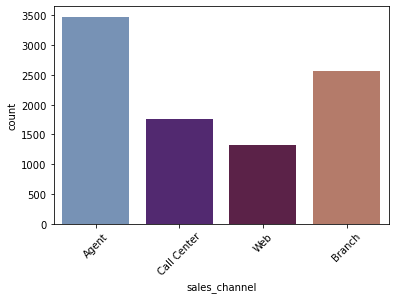

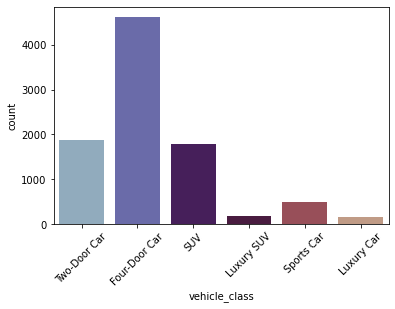

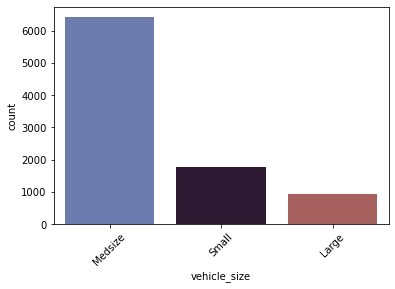

In [219]:
for column in categorical_df:
    plt.figure()
    sns.countplot(x=column, data=categorical_df, palette = 'twilight')
    plt.xticks(rotation=45)
    plt.show()

In [220]:
#There might be some columns that seem to be redundant, check their values to be sure. 
#What should we do with them?

In [221]:
categorical_df.sales_channel.value_counts() #I think Agent it's usually related to Branch or the type of sales uses to be similar


Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [222]:
categorical_df = categorical_df.replace({"Agent": "Branch"})


In [223]:
categorical_df.sales_channel.value_counts()

Branch         6044
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [224]:
categorical_df.vehicle_class.value_counts()

# I'm going to clasify this feature in: Four-Door Car, Two-Door Car, Sports Car and Luxury Car. According to the definition of SUV is a Sport Utility vehicle

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [225]:
categorical_df = categorical_df.replace({"SUV": "Sports Car", "Luxury SUV":"Luxury Car"})

In [226]:
categorical_df.vehicle_class.value_counts()

Four-Door Car    4621
Sports Car       2280
Two-Door Car     1886
Luxury Car        347
Name: vehicle_class, dtype: int64

In [202]:
categorical_df.policy.value_counts() 
# I could change this into Personal, Corporate, Special, but I think there won't be any difference between this classification and the one in policy_type.
# As I don't have information about the difference between the different L's, maybe we could be losing information.



Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [203]:
#Plot time variable. Can you extract something from it?

In [227]:
numerical_df.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147
1,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247
3,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879


In [228]:
numerical_df.effective_to_date.value_counts()

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-31    178
2011-01-03    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-01-05    167
2011-02-27    167
2011-01-11    166
2011-02-04    164
2011-02-10    161
2011-02-28    161
2011-01-02    160
2011-01-21    160
2011-01-29    160
2011-02-22    158
2011-02-05    158
2011-02-03    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-02-01    154
2011-01-18    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-07    151
2011-01-25    151
2011-02-25    149
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-01-06    143
2011-02-23    143
2011-01-16    142
2011-02-16    139
2011-02-13    139
2011-02-24    139
2011-02-09    137
2011-02-17    136
2011-01-22    136
2011-02-08    134
2011-02-20

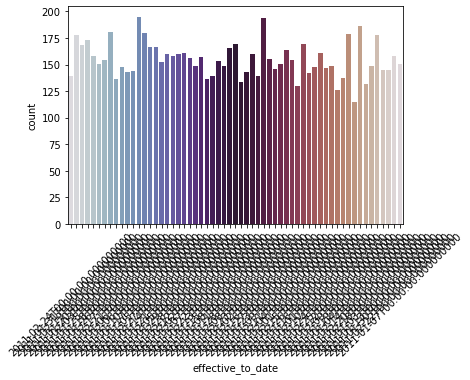

In [229]:
plt.figure()
sns.countplot(x= "effective_to_date", data=numerical_df, palette = 'twilight')
plt.xticks(rotation=45)
plt.show()

In [230]:
#It is hard to read this graph due to all the different dates. On the result from value_counts() we can see that the year is always the same (2011), 
# months are repeated and there are different data entries in the same months. 
# The easiest thing will be to see the information by months, instead of having it broken down by days.



In [231]:
numerical_df.effective_to_date.value_counts()

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-31    178
2011-01-03    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-01-05    167
2011-02-27    167
2011-01-11    166
2011-02-04    164
2011-02-10    161
2011-02-28    161
2011-01-02    160
2011-01-21    160
2011-01-29    160
2011-02-22    158
2011-02-05    158
2011-02-03    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-02-01    154
2011-01-18    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-07    151
2011-01-25    151
2011-02-25    149
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-01-06    143
2011-02-23    143
2011-01-16    142
2011-02-16    139
2011-02-13    139
2011-02-24    139
2011-02-09    137
2011-02-17    136
2011-01-22    136
2011-02-08    134
2011-02-20

In [232]:
numerical_df["effective_to_date"] = numerical_df["effective_to_date"].dt.strftime("%Y-%m")


In [233]:
numerical_df.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,2011-02,56274,69,32,5,0,1,384.811147
1,6979.535903,2011-01,0,94,13,42,0,8,1131.464935
2,12887.431650,2011-02,48767,108,18,38,0,2,566.472247
3,7645.861827,2011-01,0,106,18,65,0,7,529.881344
4,2813.692575,2011-02,43836,73,12,44,0,1,138.130879


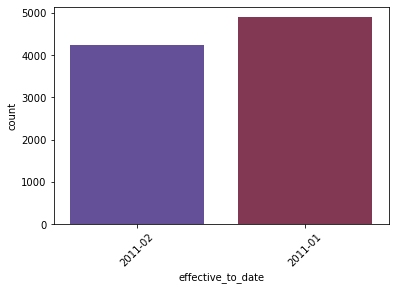

In [234]:
plt.figure()
sns.countplot(x= "effective_to_date", data=numerical_df, palette = 'twilight')
plt.xticks(rotation=45)
plt.show()